[Reference](https://anyi-guo.medium.com/linear-regression-vs-generalized-linear-models-glm-whats-the-difference-a6bf78d2c968)

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
# generate some data
x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6]).reshape((-1, 1))
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
# fit linear regression model on data
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [2]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.5754611008553381


In [3]:
import numpy as np
import statsmodels.api as sm
# using the same data from the linear regression model above
x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6]).reshape((-1, 1))
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
# fit data to GLM model
model = sm.GLM(y,x) # Default is Normal distribution, a.k.a. Gaussian. To specify the binomial distribution, use family = sm.family.Binomial()
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   13
Model:                            GLM   Df Residuals:                       12
Model Family:                Gaussian   Df Model:                            0
Link Function:               identity   Scale:                          2539.8
Method:                          IRLS   Log-Likelihood:                -68.885
Date:                Thu, 02 Jun 2022   Deviance:                       30478.
Time:                        14:40:15   Pearson chi2:                 3.05e+04
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             8.8484      1.624      5.448      0.0

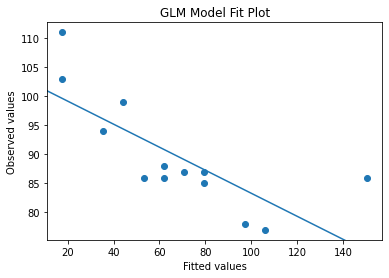

In [4]:
import matplotlib.pyplot as plt
from statsmodels.graphics.api import abline_plot

nobs = results.nobs # number of observations
yhat = results.mu # predicted value from the GLM model
fig, ax = plt.subplots()
ax.scatter(yhat, y)
line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)
ax.set_title('GLM Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values')
plt.show()